In [28]:
import csv
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Notes

* taken from [538](https://github.com/fivethirtyeight/guns-data)
* WIP

## Read Data

In [29]:
# read csv
with open('guns.csv', 'r') as f:
    r = csv.reader(f)
    data = list(r)
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education'], ['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4']]


In [30]:
# extract header row
headers = data[:1]
data = data[1:]
print(headers)
print('-------')
print(data[:5])

[['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']]
-------
[['1', '2012', '01', 'Suicide', '0', 'M', '34', 'Asian/Pacific Islander', '100', 'Home', '4'], ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'], ['3', '2012', '01', 'Suicide', '0', 'M', '60', 'White', '100', 'Other specified', '4'], ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'], ['5', '2012', '02', 'Suicide', '0', 'M', '31', 'White', '100', 'Other specified', '2']]


### Deaths By Year

In [31]:
years = [row[1] for row in data]
year_counts = {}
for year in years:
    if year not in year_counts:
        year_counts[year] = 0
    year_counts[year] += 1
    
year_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

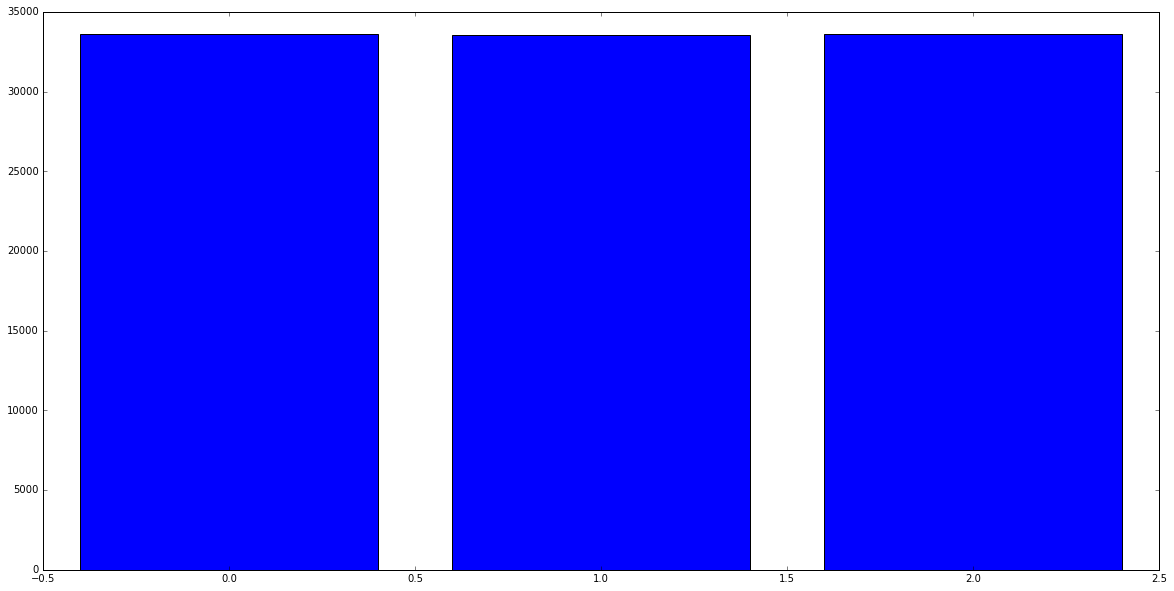

In [32]:
plt.bar(range(len(year_counts)), year_counts.values(), align='center')
plt.show()

### Death by Month

In [33]:
# deaths per datetime
dates = [datetime.datetime(year=int(row[1]), month=int(row[2]), day=1) for row in data]
print(dates[:5])

[datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 1, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0), datetime.datetime(2012, 2, 1, 0, 0)]


In [34]:
date_counts = {}
for date in dates:
    if date not in date_counts:
        date_counts[date] = 0
    date_counts[date] += 1
    
date_counts

{datetime.datetime(2012, 1, 1, 0, 0): 2758,
 datetime.datetime(2012, 2, 1, 0, 0): 2357,
 datetime.datetime(2012, 3, 1, 0, 0): 2743,
 datetime.datetime(2012, 4, 1, 0, 0): 2795,
 datetime.datetime(2012, 5, 1, 0, 0): 2999,
 datetime.datetime(2012, 6, 1, 0, 0): 2826,
 datetime.datetime(2012, 7, 1, 0, 0): 3026,
 datetime.datetime(2012, 8, 1, 0, 0): 2954,
 datetime.datetime(2012, 9, 1, 0, 0): 2852,
 datetime.datetime(2012, 10, 1, 0, 0): 2733,
 datetime.datetime(2012, 11, 1, 0, 0): 2729,
 datetime.datetime(2012, 12, 1, 0, 0): 2791,
 datetime.datetime(2013, 1, 1, 0, 0): 2864,
 datetime.datetime(2013, 2, 1, 0, 0): 2375,
 datetime.datetime(2013, 3, 1, 0, 0): 2862,
 datetime.datetime(2013, 4, 1, 0, 0): 2798,
 datetime.datetime(2013, 5, 1, 0, 0): 2806,
 datetime.datetime(2013, 6, 1, 0, 0): 2920,
 datetime.datetime(2013, 7, 1, 0, 0): 3079,
 datetime.datetime(2013, 8, 1, 0, 0): 2859,
 datetime.datetime(2013, 9, 1, 0, 0): 2742,
 datetime.datetime(2013, 10, 1, 0, 0): 2808,
 datetime.datetime(2013, 11,

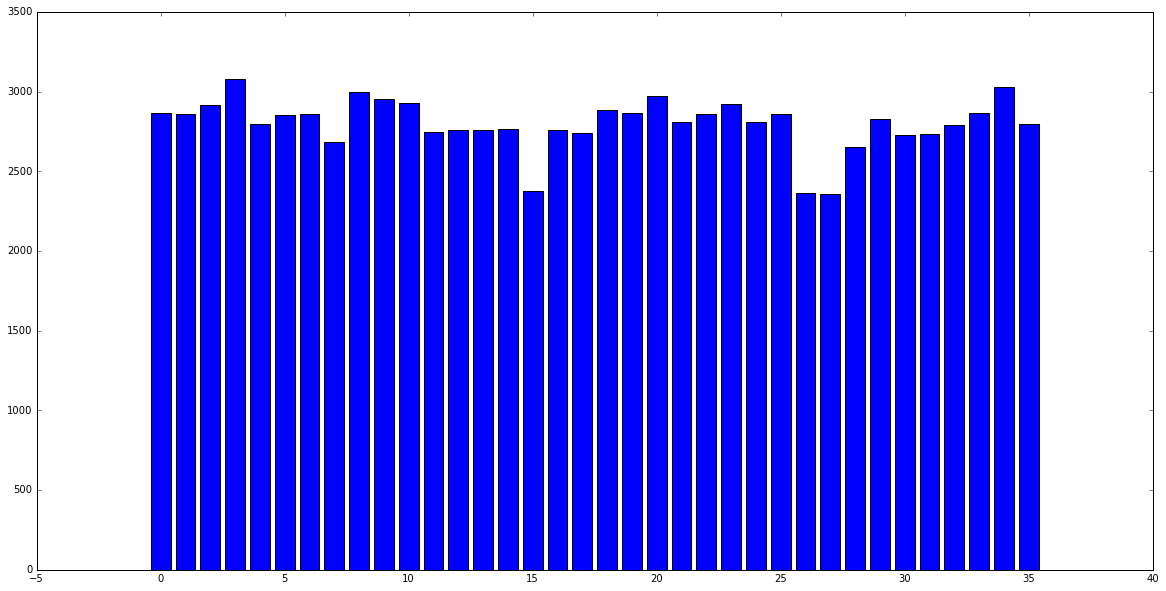

In [35]:
plt.bar(range(len(date_counts)), date_counts.values(), align='center')
plt.show()

### Deaths by Sex

In [36]:
# sex counts
sexes = [row[5] for row in data]
sex_counts = {}
for sex in sexes:
    if sex not in sex_counts:
        sex_counts[sex] = 0
    sex_counts[sex] += 1
sex_counts

{'F': 14449, 'M': 86349}

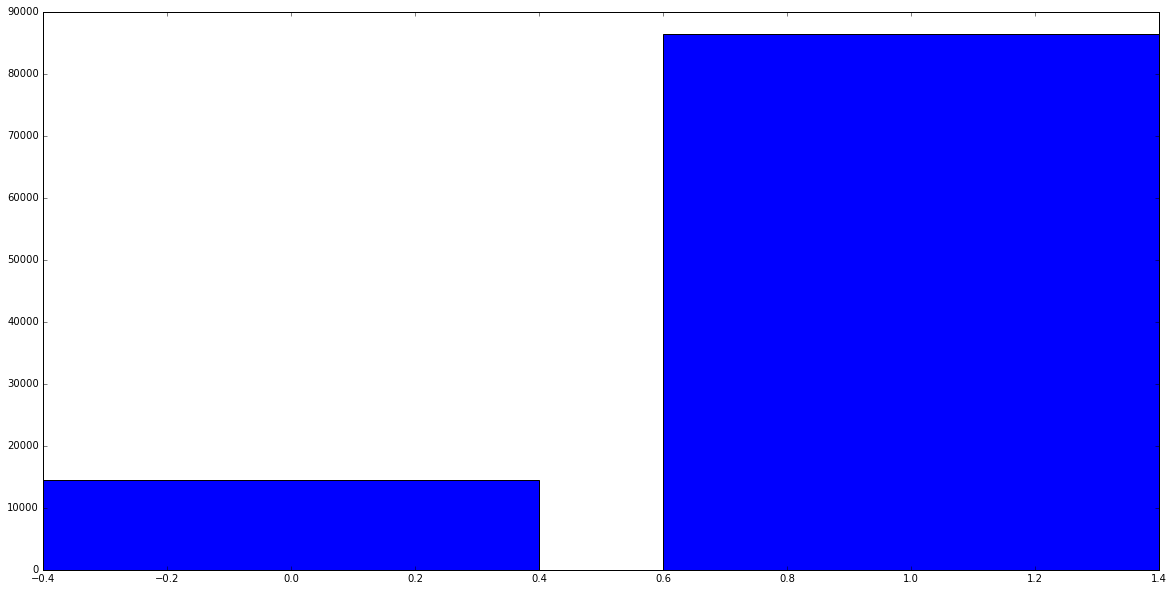

In [37]:
plt.bar(range(len(sex_counts)), sex_counts.values(), align='center')
plt.show()

### Deaths by Race

In [46]:
# race counts
races = [row[7] for row in data]
race_counts = {}
for race in races:
    if race not in race_counts:
        race_counts[race] = 0
    race_counts[race] += 1
race_counts

{'Asian/Pacific Islander': 1326,
 'Black': 23296,
 'Hispanic': 9022,
 'Native American/Native Alaskan': 917,
 'White': 66237}

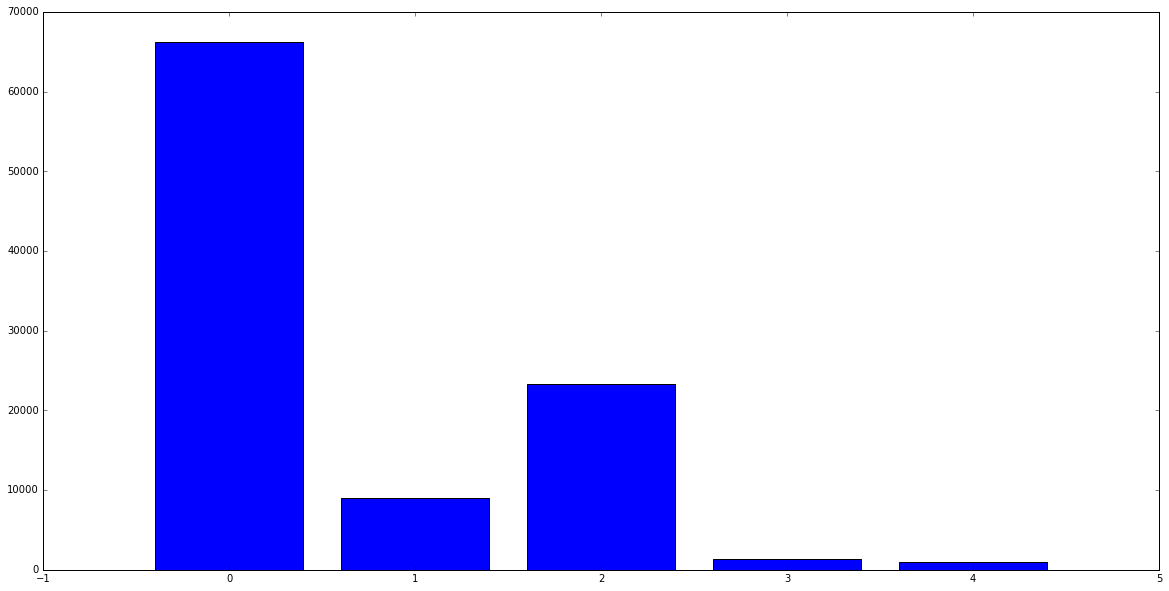

In [39]:
plt.bar(range(len(race_counts)), race_counts.values(), align='center')
plt.show()

### Notes:

* much more males than females (approx. 85%)
* largely Caucasian

## Deaths Per 100k

In [40]:
# read census csv
with open('census.csv', 'r') as f:
    r = csv.reader(f)
    census = list(r)
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

In [44]:
# create mapping between data sets
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Native American/Native Alaskan": 3739506,
    "Black": 40250635,
    "Hispanic": 44618105,
    "White": 197318956
}

# calculate D/100k - gun deaths / population * 100k
race_per_hundredk = {}
for k,v in race_counts.items():
    print(str(k) + " - " + str(v))
    race_per_hundredk[k] = (v / mapping[k]) * 100000

race_per_hundredk
    

White - 66237
Hispanic - 9022
Black - 23296
Asian/Pacific Islander - 1326
Native American/Native Alaskan - 917


{'Asian/Pacific Islander': 8.374309664161762,
 'Black': 57.8773477735196,
 'Hispanic': 20.220491210910907,
 'Native American/Native Alaskan': 24.521955573811088,
 'White': 33.56849303419181}

## Homicide by Race

In [52]:
# extract homicide values
intents = [row[3] for row in data]
homicide_race_counts = {}
for i,race in enumerate(races):
    if race not in homicide_race_counts:
        homicide_race_counts[race] = 0
    if intents[i] == "Homicide":
        homicide_race_counts[race] += 1
    
race_per_hundredk = {}
for k,v in homicide_race_counts.items():
    race_per_hundredk[k] = (v / mapping[k]) * 100000

race_per_hundredk

{'Asian/Pacific Islander': 3.530346230970155,
 'Black': 48.471284987180944,
 'Hispanic': 12.627161104219914,
 'Native American/Native Alaskan': 8.717729026240365,
 'White': 4.6356417981453335}